# <u>Project 2: Digit recognizer</u>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load('emnist_hex_images.npy')
y = np.load('emnist_hex_labels.npy')

## <u>Data exploration</u>


In [3]:
X.shape

(107802, 400)

In [4]:
y.shape

(107802,)

In [5]:
print(np.min(X), np.max(X))

0 255


In [6]:
np.argwhere(np.isnan(X))

array([], shape=(0, 2), dtype=int64)

In [7]:
np.argwhere(np.isnan(y))

array([], shape=(0, 1), dtype=int64)

In [8]:
np.unique(y, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       dtype=uint8),
 array([7407, 7642, 7371, 7397, 7397, 7220, 7382, 7451, 7327, 7374, 6022,
        3878, 6198, 4562, 1337, 6159, 5678], dtype=int64))

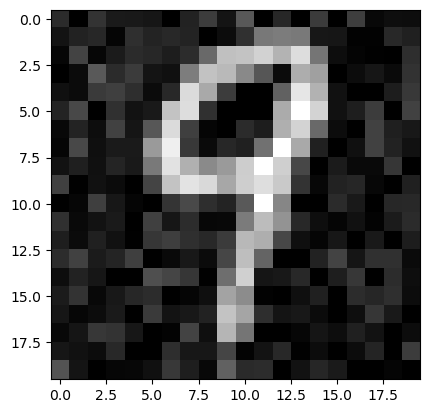

In [9]:
plt.imshow(X[0].reshape(20,20), vmin=0, vmax=255, cmap='gray');

In [10]:
#Function that returns image number n of each label instance in a list except none:

def return_images(n):
    zero = X[y == 0][n]
    one = X[y == 1][n]
    two = X[y == 2][n]
    three = X[y == 3][n]
    four = X[y == 4][n]
    five = X[y == 5][n]
    six = X[y == 6][n]
    seven = X[y == 7][n]
    eight = X[y == 8][n]
    nine = X[y == 9][n]
    a = X[y == 10][n]
    b = X[y == 11][n]
    c = X[y == 12][n]
    d = X[y == 13][n]
    e = X[y == 14][n]
    f = X[y == 15][n]

    return [zero, one, two, three, four, five, six, seven, eight, nine, a, b, c, d, e, f]

In [11]:
#Function that plots an image of each class found using return_images

def plot_images(n):
    fig, ax = plt.subplots(nrows=4, ncols=4)
    fig.suptitle(f'Plot number {n + 1}')
    labels = return_images(n)
    idx = 0
    
    for ax in ax.flatten():
        ax.imshow(labels[idx].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
        ax.axis('off')
        idx += 1

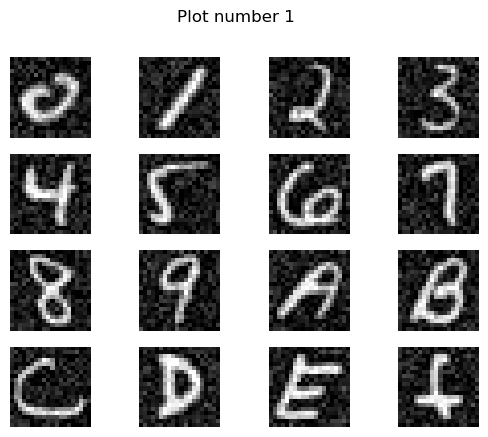

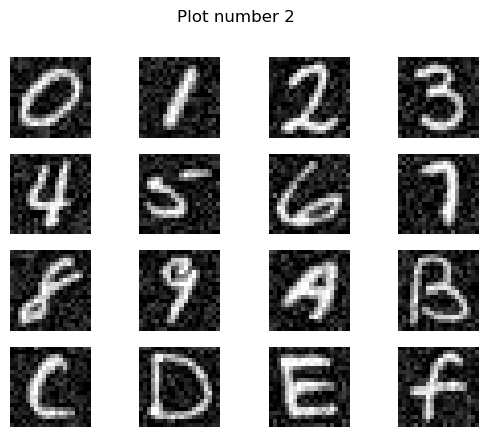

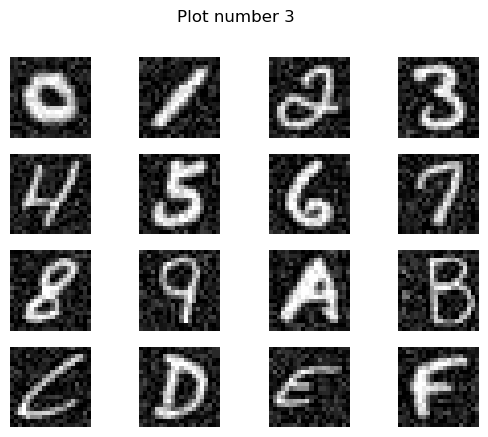

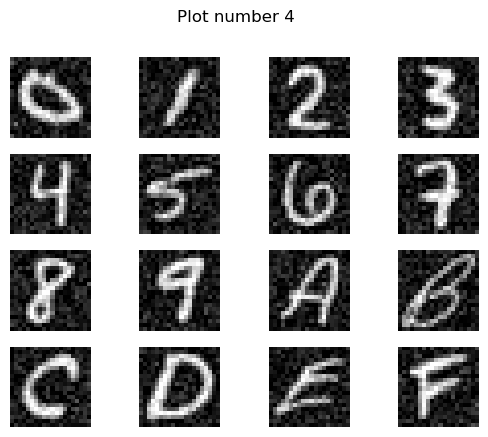

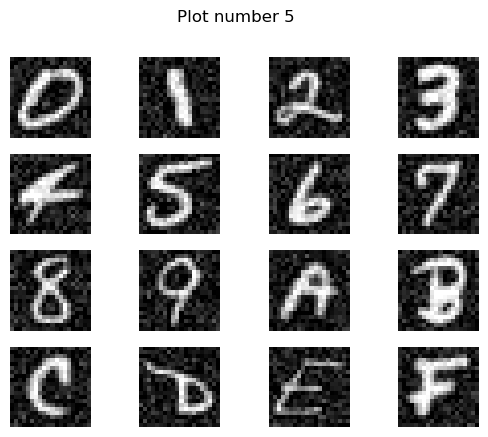

In [12]:
for n in range(0,5):
    plot_images(n)

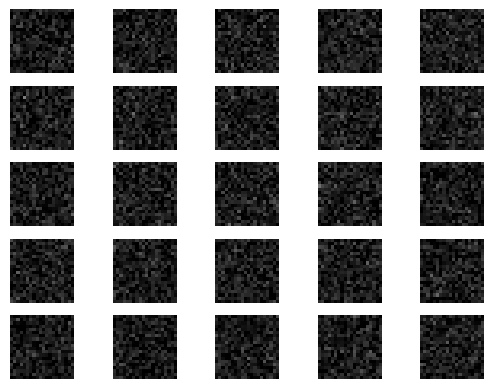

In [13]:
#Adapting the plot images function to plot instances of the blank character:

def plot_blank():
    fig, ax = plt.subplots(nrows=5, ncols=5)
    labels = X[y == 16][:25]
    idx = 0
    
    for ax in ax.flatten():
        ax.imshow(labels[idx].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
        ax.axis('off')
        idx += 1

plot_blank()

## <u>KNN</u>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

In [16]:
def multiple_knn(k_values):
    models = []
    f1_val_list = []
    
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        models.append(model) #saving the model for potential later use

        val_preds = model.predict(X_val)

        f1_val = f1_score(y_val, val_preds, average='weighted')

        f1_val_list.append(f1_val)

        print('Finished training model with k = ', k)

    return (models, f1_val_list)


In [17]:
k_values = [1,3,5,9,15]
models, val_f1 = multiple_knn(k_values)

Finished training model with k =  1
Finished training model with k =  3
Finished training model with k =  5
Finished training model with k =  9
Finished training model with k =  15


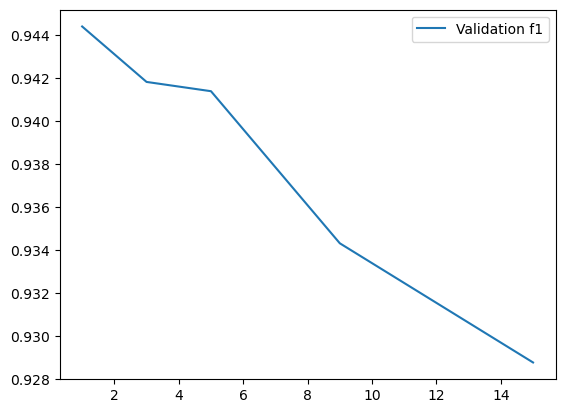

In [18]:
plt.plot(k_values, val_f1)
plt.legend(['Validation f1']);

### <u>Final KNN evaluation</u>

In [19]:
final_knn = models[np.argmax(val_f1)]
final_knn_preds = final_knn.predict(X_test)
print(f1_score(y_test, final_knn_preds, average='weighted'))

0.9507183992953655


In [20]:
print(classification_report(y_test, final_knn_preds))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       775
           1       0.95      1.00      0.97       819
           2       0.98      0.96      0.97       743
           3       0.94      0.97      0.96       734
           4       0.97      0.94      0.96       711
           5       0.97      0.97      0.97       750
           6       0.97      0.99      0.98       743
           7       0.96      0.98      0.97       725
           8       0.95      0.91      0.93       736
           9       0.95      0.95      0.95       710
          10       0.96      0.97      0.97       592
          11       0.90      0.77      0.83       357
          12       0.94      0.99      0.97       606
          13       0.91      0.82      0.86       444
          14       0.95      0.82      0.88       143
          15       0.95      0.94      0.94       623
          16       0.99      1.00      1.00       570

    accuracy              

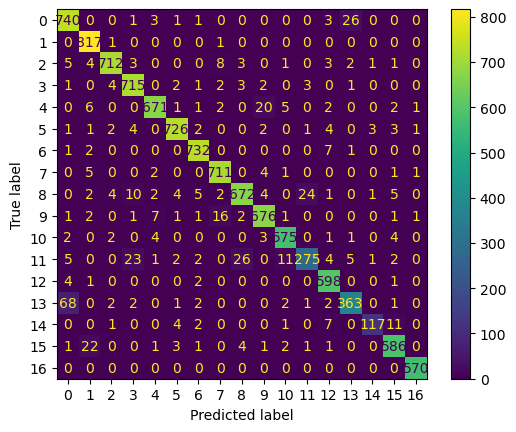

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, final_knn_preds);

In [22]:
np.unique(y_test[y_test != final_knn_preds], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint8),
 array([35,  2, 31, 19, 40, 24, 11, 14, 64, 34, 17, 82,  8, 81, 26, 37],
       dtype=int64))

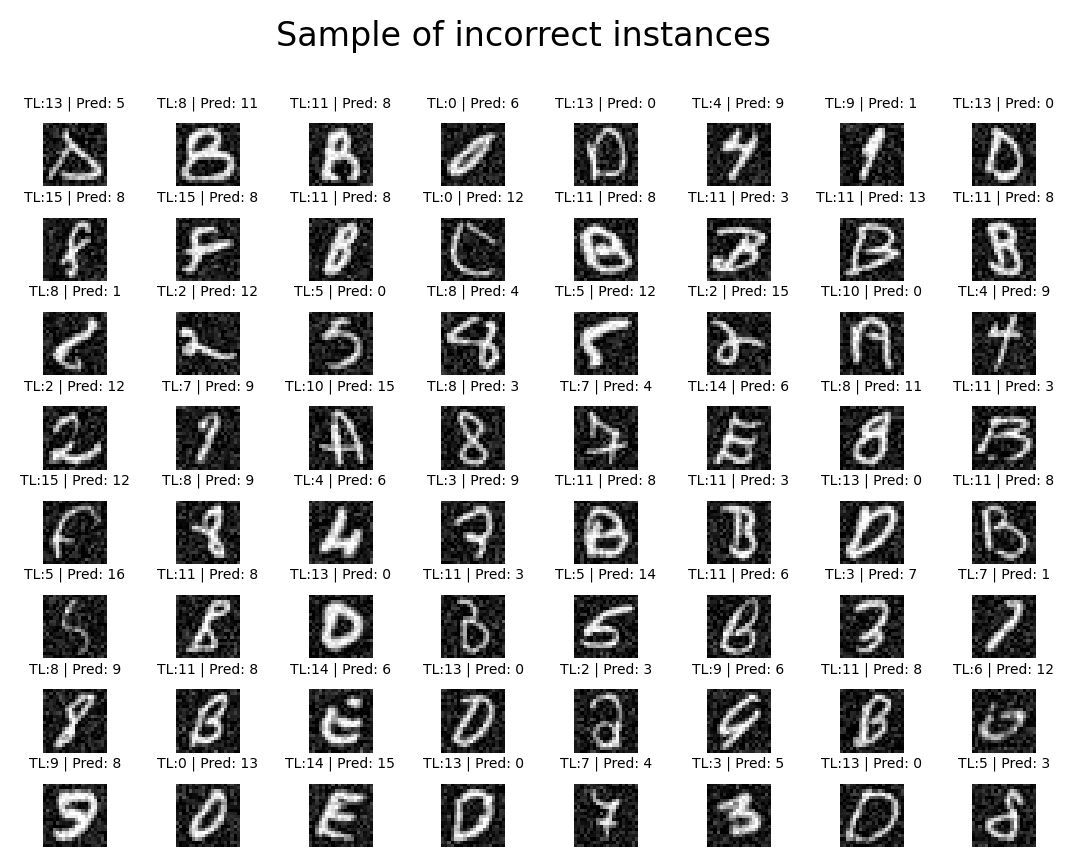

In [23]:
misclassified = X_test[y_test != final_knn_preds]
misclassified_y = y_test[y_test != final_knn_preds]
misclassified_pred = final_knn_preds[y_test != final_knn_preds]

def plot_incorrect():
    fig, ax = plt.subplots(nrows=8, ncols=8)
    plt.subplots_adjust(wspace=1.1)
    fig.suptitle('Sample of incorrect instances')
    fig.set_dpi(200.0)

    idx = 0
    for ax in ax.flatten():
        ax.imshow(misclassified[idx].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
        ax.set_title(f'TL:{misclassified_y[idx]} | Pred: {misclassified_pred[idx]}', fontsize=5)
        ax.axis('off')
        idx += 1

plot_incorrect()

## <u>Random forest classifier</u>

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf_models = []
rf_models_f1 = []

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_val)
f1 = f1_score(y_val, preds, average='weighted')

rf_models.append(rf)
rf_models_f1.append(f1)

print(f1)

0.932690072088919


In [27]:
train_preds = rf.predict(X_train)
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5916
           1       1.00      1.00      1.00      6056
           2       1.00      1.00      1.00      5911
           3       1.00      1.00      1.00      5884
           4       1.00      1.00      1.00      5927
           5       1.00      1.00      1.00      5790
           6       1.00      1.00      1.00      5900
           7       1.00      1.00      1.00      5963
           8       1.00      1.00      1.00      5880
           9       1.00      1.00      1.00      5941
          10       1.00      1.00      1.00      4853
          11       1.00      1.00      1.00      3129
          12       1.00      1.00      1.00      4936
          13       1.00      1.00      1.00      3634
          14       1.00      1.00      1.00      1073
          15       1.00      1.00      1.00      4891
          16       1.00      1.00      1.00      4557

    accuracy              

In [29]:
rf_prune = RandomForestClassifier(n_estimators=100, max_features='sqrt',random_state=101,
                                  max_depth=10, max_leaf_nodes = 100)
rf_prune.fit(X_train, y_train)
preds = rf_prune.predict(X_val)
f1 = f1_score(y_val, preds, average='weighted')

rf_models.append(rf_prune)
rf_models_f1.append(f1)

print(f1)

0.8142096303499491


In [32]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       716
           1       0.97      0.98      0.97       767
           2       0.94      0.97      0.95       717
           3       0.96      0.96      0.96       779
           4       0.93      0.94      0.94       759
           5       0.94      0.94      0.94       680
           6       0.95      0.97      0.96       739
           7       0.97      0.96      0.97       763
           8       0.91      0.87      0.89       711
           9       0.93      0.95      0.94       723
          10       0.92      0.95      0.94       577
          11       0.82      0.78      0.80       392
          12       0.94      0.96      0.95       656
          13       0.93      0.77      0.84       484
          14       0.96      0.61      0.75       121
          15       0.90      0.95      0.93       645
          16       1.00      1.00      1.00       551

    accuracy              

In [30]:
rf_prune = RandomForestClassifier(n_estimators=100, max_features='sqrt',random_state=101,
                                  max_depth=50)
rf_prune.fit(X_train, y_train)
preds = rf_prune.predict(X_val)

f1 = f1_score(y_val, preds, average='weighted')

rf_models.append(rf_prune)
rf_models_f1.append(f1)

print(f1)

0.932736848536341


In [31]:
rf_prune = RandomForestClassifier(n_estimators=100, max_features='sqrt',random_state=101,
                                  max_depth=80)
rf_prune.fit(X_train, y_train)
preds = rf_prune.predict(X_val)

f1 = f1_score(y_val, preds, average='weighted')

rf_models.append(rf_prune)
rf_models_f1.append(f1)

print(f1)

0.9324154605878118


In [33]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       716
           1       0.97      0.98      0.97       767
           2       0.94      0.97      0.95       717
           3       0.96      0.96      0.96       779
           4       0.93      0.94      0.94       759
           5       0.94      0.94      0.94       680
           6       0.95      0.97      0.96       739
           7       0.97      0.96      0.97       763
           8       0.91      0.87      0.89       711
           9       0.93      0.95      0.94       723
          10       0.92      0.95      0.94       577
          11       0.82      0.78      0.80       392
          12       0.94      0.96      0.95       656
          13       0.93      0.77      0.84       484
          14       0.96      0.61      0.75       121
          15       0.90      0.95      0.93       645
          16       1.00      1.00      1.00       551

    accuracy              

In [34]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [35]:
pca = PCA(n_components=30, random_state=101)
pca.fit(X_train)
reduced_X_train = pca.transform(X_train)
reduced_X_val = pca.transform(X_val)
reduced_X_test = pca.transform(X_test)

In [66]:
#param_grid = {'criterion':['gini', 'entropy'],
              #'n_estimators':[100,150],
              #'random_state':[101],
              #'max_features':['sqrt'],
              #'max_depth':[80,100,150,None],
             #}

#rfc = RandomForestClassifier()

#grid = GridSearchCV(rfc, param_grid, verbose=2, n_jobs=-1)
#grid.fit(reduced_X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 100, 150, None],
                         'max_features': ['sqrt'], 'n_estimators': [100, 150],
                         'random_state': [101]},
             verbose=2)

In [67]:
#import joblib

#joblib.dump(grid, 'rf_grid.pkl')

['rf_grid.pkl']

In [86]:
#grid_model = joblib.load('rf_grid.pkl')

In [87]:
#grid_model.best_estimator_

RandomForestClassifier(max_depth=80, n_estimators=150, random_state=101)

In [39]:
grid_model = RandomForestClassifier(max_depth=80, n_estimators=150, random_state=101)
grid_model.fit(reduced_X_train, y_train)

RandomForestClassifier(max_depth=80, n_estimators=150, random_state=101)

In [40]:
grid_preds = grid_model.predict(reduced_X_val)
f1 = f1_score(y_val, grid_preds, average='weighted')

rf_models.append(grid_model)
rf_models_f1.append(f1)

print(f1)

0.927871455358729


In [41]:
print(classification_report(y_val, grid_preds))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       716
           1       0.97      0.98      0.98       767
           2       0.93      0.96      0.95       717
           3       0.95      0.94      0.94       779
           4       0.93      0.93      0.93       759
           5       0.93      0.94      0.93       680
           6       0.94      0.97      0.96       739
           7       0.96      0.96      0.96       763
           8       0.90      0.87      0.88       711
           9       0.94      0.94      0.94       723
          10       0.91      0.95      0.93       577
          11       0.83      0.73      0.78       392
          12       0.94      0.95      0.95       656
          13       0.92      0.81      0.86       484
          14       0.97      0.59      0.73       121
          15       0.88      0.94      0.91       645
          16       1.00      1.00      1.00       551

    accuracy              

In [42]:
print(np.argmax(rf_models_f1))

3


### <u>Final random forest evaluation</u>

In [43]:
final_rf = rf_models[np.argmax(rf_models_f1)]

In [44]:
final_rf_preds = final_rf.predict(X_test)
print(f1_score(y_test, final_rf_preds, average='weighted'))

0.9365735336397187


In [45]:
print(classification_report(y_test, final_rf_preds))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       775
           1       0.97      0.98      0.98       819
           2       0.95      0.96      0.95       743
           3       0.94      0.96      0.95       734
           4       0.93      0.95      0.94       711
           5       0.93      0.94      0.94       750
           6       0.96      0.98      0.97       743
           7       0.95      0.96      0.96       725
           8       0.91      0.88      0.89       736
           9       0.93      0.94      0.94       710
          10       0.93      0.97      0.95       592
          11       0.83      0.78      0.81       357
          12       0.94      0.97      0.96       606
          13       0.93      0.81      0.86       444
          14       0.98      0.63      0.77       143
          15       0.90      0.94      0.92       623
          16       1.00      1.00      1.00       570

    accuracy              

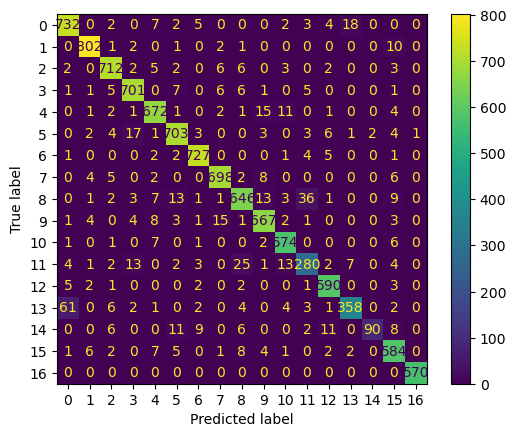

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, final_rf_preds);

## <u>Support vector machine</u>

In [47]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=101)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle', svd_solver='full', random_state=101)
pca.fit(scaled_X_train)

PCA(n_components='mle', random_state=101, svd_solver='full')

In [50]:
pca.n_components_

396

In [51]:
pca = PCA(n_components=30, random_state=101)
pca.fit(scaled_X_train)

PCA(n_components=30, random_state=101)

In [52]:
pca.n_components_

30

In [53]:
np.sum(pca.explained_variance_ratio_)

0.4579981717696585

In [54]:
reduced_X_train = pca.transform(scaled_X_train)
reduced_X_val = pca.transform(scaled_X_val)

In [55]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(reduced_X_train, y_train)

SVC()

In [56]:
preds = svc.predict(reduced_X_val)

In [57]:
print(f1_score(y_val, preds, average='weighted'))

0.9594711379044176


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [59]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [60]:
pca = PCA(n_components=30, random_state=101)
pca.fit(scaled_X_train)

reduced_X_train = pca.transform(scaled_X_train)
reduced_X_test = pca.transform(scaled_X_test)

In [94]:
#from sklearn.svm import SVC
#param_grid = {'C':[0.01,0.1, 0.5, 1, 10],
              #'kernel':['rbf'],
              #'random_state':[101],
              #'gamma':[0.01, 0.1, 1, 10]}

#svc_base = SVC()

#grid = GridSearchCV(svc_base, param_grid, cv=2, verbose=2)

#grid.fit(reduced_X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END ...C=0.01, gamma=0.01, kernel=rbf, random_state=101; total time= 9.5min
[CV] END ...C=0.01, gamma=0.01, kernel=rbf, random_state=101; total time=10.9min
[CV] END ....C=0.01, gamma=0.1, kernel=rbf, random_state=101; total time=25.3min
[CV] END ....C=0.01, gamma=0.1, kernel=rbf, random_state=101; total time=14.7min
[CV] END ......C=0.01, gamma=1, kernel=rbf, random_state=101; total time=16.0min
[CV] END ......C=0.01, gamma=1, kernel=rbf, random_state=101; total time=29.4min
[CV] END .....C=0.01, gamma=10, kernel=rbf, random_state=101; total time=25.7min
[CV] END .....C=0.01, gamma=10, kernel=rbf, random_state=101; total time=34.3min
[CV] END ....C=0.1, gamma=0.01, kernel=rbf, random_state=101; total time= 2.4min
[CV] END ....C=0.1, gamma=0.01, kernel=rbf, random_state=101; total time= 2.4min
[CV] END .....C=0.1, gamma=0.1, kernel=rbf, random_state=101; total time= 6.7min
[CV] END .....C=0.1, gamma=0.1, kernel=rbf, rand

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf'],
                         'random_state': [101]},
             verbose=2)

In [99]:
#import joblib

#joblib.dump(grid, 'svc_grid.pkl')

['svc_grid.pkl']

In [144]:
#grid_model = joblib.load('svc_grid.pkl')

In [145]:
#grid_model.best_estimator_

SVC(C=10, gamma=0.01, random_state=101)

### <u>Final SVC evaluation</u>

In [61]:
final_svc = SVC(C=10, gamma=0.01, kernel='rbf', random_state=101)
final_svc.fit(reduced_X_train, y_train)

SVC(C=10, gamma=0.01, random_state=101)

In [62]:
final_svc_preds = final_svc.predict(reduced_X_test)
print(f1_score(y_test, final_svc_preds, average='weighted'))
print(classification_report(y_test, final_svc_preds))

0.9683468657653789
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       722
           1       1.00      1.00      1.00       802
           2       0.98      0.98      0.98       753
           3       0.97      0.97      0.97       730
           4       0.98      0.98      0.98       745
           5       0.97      0.96      0.97       738
           6       0.98      0.98      0.98       718
           7       0.99      0.98      0.99       743
           8       0.94      0.94      0.94       705
           9       0.97      0.97      0.97       730
          10       0.97      0.98      0.98       615
          11       0.88      0.88      0.88       363
          12       0.98      0.98      0.98       630
          13       0.93      0.92      0.93       466
          14       0.93      0.91      0.92       137
          15       0.97      0.98      0.98       648
          16       1.00      1.00      1.00       536

    acc

In [63]:
np.unique(y_test[y_test != final_svc_preds], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=uint8),
 array([37,  4, 12, 23, 16, 28, 11, 12, 42, 23, 12, 44, 15, 37, 12, 13],
       dtype=int64))

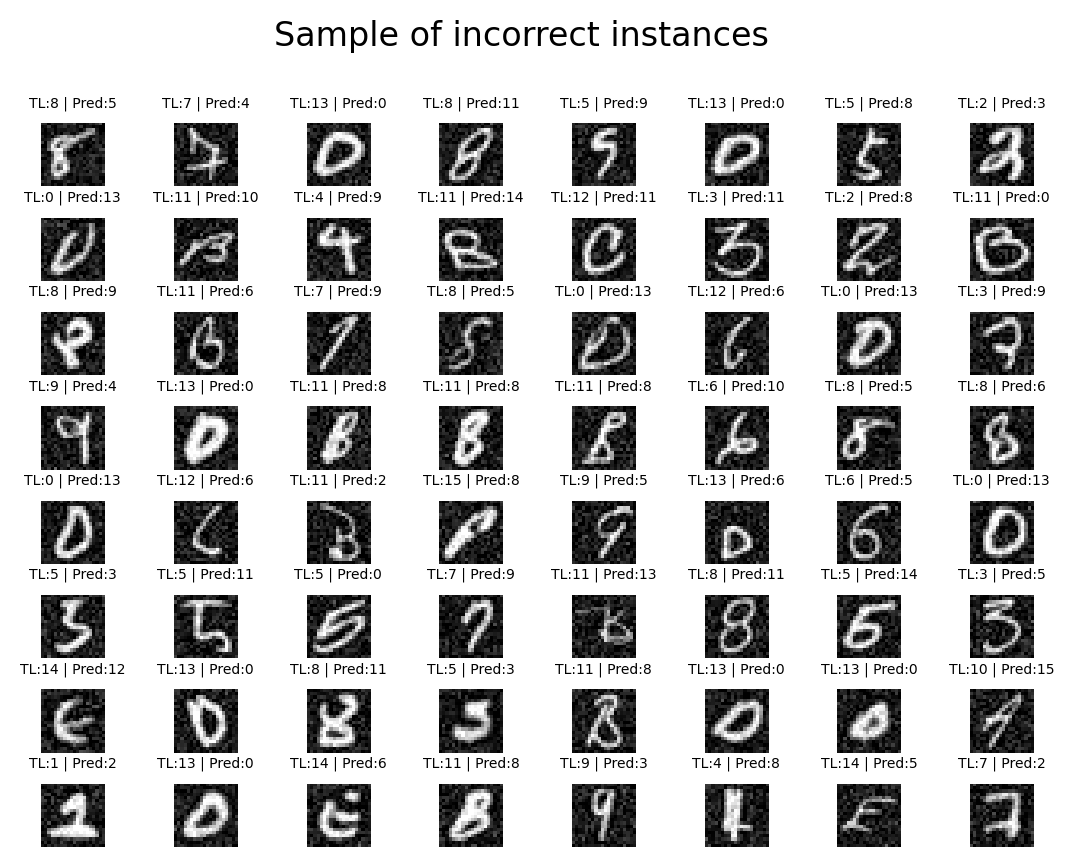

In [64]:
misclassified = X_test[y_test != final_svc_preds]
misclassified_y = y_test[y_test != final_svc_preds]
misclassified_pred = final_svc_preds[y_test != final_svc_preds]

def plot_incorrect():
    fig, ax = plt.subplots(nrows=8, ncols=8)
    plt.subplots_adjust(wspace=1.1)
    fig.suptitle('Sample of incorrect instances')
    fig.set_dpi(200.0)

    idx = 0
    for ax in ax.flatten():
        ax.imshow(misclassified[idx].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
        ax.set_title(f'TL:{misclassified_y[idx]} | Pred:{misclassified_pred[idx]}',fontsize=5)
        ax.axis('off')
        idx += 1

plot_incorrect()

## <u>Multi-layer-perceptron</u>

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=101)

In [67]:
mlp_models = []
mlp_f1 = []

In [68]:
mlp = MLPClassifier()

mlp.fit(X_train, y_train)
preds = mlp.predict(X_val)
f1 = f1_score(y_val, preds, average='weighted')

mlp_models.append(mlp)
mlp_f1.append(f1)

In [69]:
print(f1)

0.9043166417260408


In [70]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), verbose=True, random_state=101)

mlp.fit(X_train, y_train)
preds = mlp.predict(X_val)
f1 = f1_score(y_val, preds, average='weighted')

mlp_models.append(mlp)
mlp_f1.append(f1)

Iteration 1, loss = 2.84844906
Iteration 2, loss = 0.95046180
Iteration 3, loss = 0.64390338
Iteration 4, loss = 0.46639809
Iteration 5, loss = 0.35656180
Iteration 6, loss = 0.29426691
Iteration 7, loss = 0.25149427
Iteration 8, loss = 0.22153910
Iteration 9, loss = 0.19613833
Iteration 10, loss = 0.17886990
Iteration 11, loss = 0.15734658
Iteration 12, loss = 0.14424115
Iteration 13, loss = 0.13914986
Iteration 14, loss = 0.12911359
Iteration 15, loss = 0.11809080
Iteration 16, loss = 0.10906090
Iteration 17, loss = 0.10357662
Iteration 18, loss = 0.09934174
Iteration 19, loss = 0.09075527
Iteration 20, loss = 0.08663156
Iteration 21, loss = 0.08440929
Iteration 22, loss = 0.07649331
Iteration 23, loss = 0.06805015
Iteration 24, loss = 0.07034491
Iteration 25, loss = 0.06550213
Iteration 26, loss = 0.06095115
Iteration 27, loss = 0.06260507
Iteration 28, loss = 0.06298573
Iteration 29, loss = 0.05433841
Iteration 30, loss = 0.04877613
Iteration 31, loss = 0.05417947
Iteration 32, los

In [112]:
print(f1)

0.9542453433737542


In [72]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), verbose=True, early_stopping=True, random_state=101,
                     n_iter_no_change=15)

mlp.fit(X_train, y_train)

preds = mlp.predict(X_val)
f1 = f1_score(y_val, preds, average='weighted')

mlp_models.append(mlp)
mlp_f1.append(f1)

Iteration 1, loss = 3.01972552
Validation score: 0.630493
Iteration 2, loss = 1.04035478
Validation score: 0.787942
Iteration 3, loss = 0.67261544
Validation score: 0.825623
Iteration 4, loss = 0.49085251
Validation score: 0.875362
Iteration 5, loss = 0.38813701
Validation score: 0.888696
Iteration 6, loss = 0.32807486
Validation score: 0.902377
Iteration 7, loss = 0.28048787
Validation score: 0.902957
Iteration 8, loss = 0.24889453
Validation score: 0.912116
Iteration 9, loss = 0.21857535
Validation score: 0.914783
Iteration 10, loss = 0.20334154
Validation score: 0.917913
Iteration 11, loss = 0.17755205
Validation score: 0.923826
Iteration 12, loss = 0.16096792
Validation score: 0.928000
Iteration 13, loss = 0.14926596
Validation score: 0.926261
Iteration 14, loss = 0.13777758
Validation score: 0.935420
Iteration 15, loss = 0.12783690
Validation score: 0.921391
Iteration 16, loss = 0.12810005
Validation score: 0.936464
Iteration 17, loss = 0.10636323
Validation score: 0.932290
Iterat

In [73]:
print(f1)

0.9542453433737542


In [74]:
mlp = MLPClassifier(hidden_layer_sizes=(200,150,100,50), verbose=True, early_stopping=True, random_state=101,
                     n_iter_no_change=15)

mlp.fit(X_train, y_train)

print(classification_report(y_val, mlp.predict(X_val)))

preds = mlp.predict(X_val)

mlp_models.append(mlp)
mlp_f1.append(f1)

Iteration 1, loss = 1.56689636
Validation score: 0.833971
Iteration 2, loss = 0.44757017
Validation score: 0.883130
Iteration 3, loss = 0.31877194
Validation score: 0.898551
Iteration 4, loss = 0.25720606
Validation score: 0.916290
Iteration 5, loss = 0.21556203
Validation score: 0.926725
Iteration 6, loss = 0.18982970
Validation score: 0.918493
Iteration 7, loss = 0.16650041
Validation score: 0.933217
Iteration 8, loss = 0.14625487
Validation score: 0.929159
Iteration 9, loss = 0.13699809
Validation score: 0.936812
Iteration 10, loss = 0.12808018
Validation score: 0.939710
Iteration 11, loss = 0.11417644
Validation score: 0.940058
Iteration 12, loss = 0.10585794
Validation score: 0.932870
Iteration 13, loss = 0.09751273
Validation score: 0.944116
Iteration 14, loss = 0.09543861
Validation score: 0.942957
Iteration 15, loss = 0.08594374
Validation score: 0.944580
Iteration 16, loss = 0.08361819
Validation score: 0.940638
Iteration 17, loss = 0.08651368
Validation score: 0.947130
Iterat

In [75]:
print(f1)

0.9542453433737542


In [76]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), verbose=True, early_stopping=True, random_state=101,
                     learning_rate='adaptive', n_iter_no_change=10)

mlp.fit(X_train, y_train)

preds = mlp.predict(X_val)

mlp_models.append(mlp)
mlp_f1.append(f1)

Iteration 1, loss = 3.01972552
Validation score: 0.630493
Iteration 2, loss = 1.04035478
Validation score: 0.787942
Iteration 3, loss = 0.67261544
Validation score: 0.825623
Iteration 4, loss = 0.49085251
Validation score: 0.875362
Iteration 5, loss = 0.38813701
Validation score: 0.888696
Iteration 6, loss = 0.32807486
Validation score: 0.902377
Iteration 7, loss = 0.28048787
Validation score: 0.902957
Iteration 8, loss = 0.24889453
Validation score: 0.912116
Iteration 9, loss = 0.21857535
Validation score: 0.914783
Iteration 10, loss = 0.20334154
Validation score: 0.917913
Iteration 11, loss = 0.17755205
Validation score: 0.923826
Iteration 12, loss = 0.16096792
Validation score: 0.928000
Iteration 13, loss = 0.14926596
Validation score: 0.926261
Iteration 14, loss = 0.13777758
Validation score: 0.935420
Iteration 15, loss = 0.12783690
Validation score: 0.921391
Iteration 16, loss = 0.12810005
Validation score: 0.936464
Iteration 17, loss = 0.10636323
Validation score: 0.932290
Iterat

In [77]:
print(f1)

0.9542453433737542


### <u>Final MLP evaluation</u>

In [78]:
mlp_models

[MLPClassifier(),
 MLPClassifier(hidden_layer_sizes=(150, 100, 50), random_state=101, verbose=True),
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(150, 100, 50),
               n_iter_no_change=15, random_state=101, verbose=True),
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(200, 150, 100, 50),
               n_iter_no_change=15, random_state=101, verbose=True),
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(150, 100, 50),
               learning_rate='adaptive', random_state=101, verbose=True)]

In [79]:
final_mlp = mlp_models[np.argmax(mlp_f1)]

In [80]:
final_mlp

MLPClassifier(hidden_layer_sizes=(150, 100, 50), random_state=101, verbose=True)

In [81]:
final_preds = final_mlp.predict(X_test)

In [82]:
print(f1_score(y_test, final_preds, average='weighted'))

0.9563636434900298


In [83]:
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       775
           1       0.99      0.99      0.99       819
           2       0.97      0.96      0.96       743
           3       0.94      0.97      0.96       734
           4       0.95      0.97      0.96       711
           5       0.98      0.94      0.96       750
           6       0.98      0.97      0.97       743
           7       0.97      0.99      0.98       725
           8       0.95      0.91      0.93       736
           9       0.97      0.95      0.96       710
          10       0.94      0.98      0.96       592
          11       0.86      0.89      0.87       357
          12       0.95      0.97      0.96       606
          13       0.88      0.92      0.90       444
          14       0.86      0.87      0.87       143
          15       0.96      0.95      0.96       623
          16       1.00      1.00      1.00       570

    accuracy              

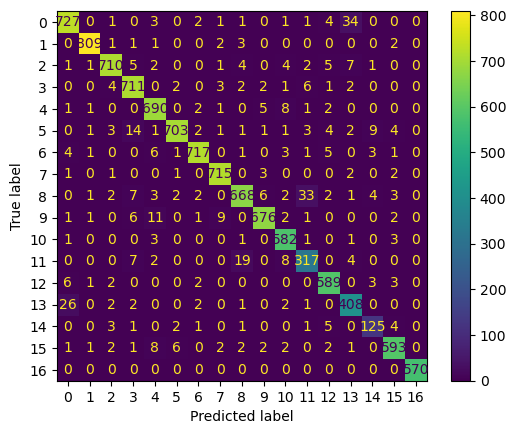

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test, final_preds);

## <u>Convolutional Neural Network</u>

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=101)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [87]:
#Giving the data the right shape for the CNN
scaled_X_train = scaled_X_train.reshape(-1, 20, 20, 1)
scaled_X_val = scaled_X_val.reshape(-1, 20, 20, 1)
scaled_X_test = scaled_X_test.reshape(-1, 20, 20, 1)

In [88]:
scaled_X_train.shape

(86241, 20, 20, 1)

In [89]:
from tensorflow import keras
from tensorflow.keras import layers

In [90]:
val_acc_list = []
model_list = []

In [91]:
model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1))) #Convolutional layer one with 3x3 filter
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #Convolutional layer two with 3x3 filter
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [92]:
from tensorflow import random

np.random.seed(0)

random.set_seed(0)

history = model.fit(scaled_X_train, y_train, epochs=10, batch_size=64, validation_data=(scaled_X_val, y_val))
final_validation_accuracy = history.history['val_accuracy'][-1] #grabbing validation accuracy in the last epoch

val_acc_list.append(final_validation_accuracy)
model_list.append(model) #saving the model and accuracy for later use

Epoch 1/10
1348/1348 [==============================] - 18s 13ms/step - loss: 0.7560 - accuracy: 0.7877 - val_loss: 0.3047 - val_accuracy: 0.9124
Epoch 2/10
1348/1348 [==============================] - 17s 12ms/step - loss: 0.2346 - accuracy: 0.9310 - val_loss: 0.2010 - val_accuracy: 0.9381
Epoch 3/10
1348/1348 [==============================] - 17s 12ms/step - loss: 0.1680 - accuracy: 0.9497 - val_loss: 0.1541 - val_accuracy: 0.9532
Epoch 4/10
1348/1348 [==============================] - 17s 13ms/step - loss: 0.1373 - accuracy: 0.9590 - val_loss: 0.1416 - val_accuracy: 0.9575
Epoch 5/10
1348/1348 [==============================] - 17s 13ms/step - loss: 0.1207 - accuracy: 0.9642 - val_loss: 0.1197 - val_accuracy: 0.9637
Epoch 6/10
1348/1348 [==============================] - 17s 12ms/step - loss: 0.1076 - accuracy: 0.9677 - val_loss: 0.1147 - val_accuracy: 0.9632
Epoch 7/10
1348/1348 [==============================] - 17s 12ms/step - loss: 0.0990 - accuracy: 0.9703 - val_loss: 0.1185 -

In [93]:
model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [94]:
np.random.seed(0)

random.set_seed(0)

history = model.fit(scaled_X_train, y_train, epochs=10, batch_size=128, validation_data=(scaled_X_val, y_val))
final_validation_accuracy = history.history['val_accuracy'][-1]

val_acc_list.append(final_validation_accuracy)
model_list.append(model) 

Epoch 1/10
674/674 [==============================] - 44s 64ms/step - loss: 1.0529 - accuracy: 0.7065 - val_loss: 0.3753 - val_accuracy: 0.8864
Epoch 2/10
674/674 [==============================] - 43s 64ms/step - loss: 0.2818 - accuracy: 0.9150 - val_loss: 0.2404 - val_accuracy: 0.9241
Epoch 3/10
674/674 [==============================] - 42s 63ms/step - loss: 0.1927 - accuracy: 0.9423 - val_loss: 0.1670 - val_accuracy: 0.9485
Epoch 4/10
674/674 [==============================] - 42s 62ms/step - loss: 0.1519 - accuracy: 0.9542 - val_loss: 0.1731 - val_accuracy: 0.9461
Epoch 5/10
674/674 [==============================] - 43s 63ms/step - loss: 0.1298 - accuracy: 0.9611 - val_loss: 0.1281 - val_accuracy: 0.9622
Epoch 6/10
674/674 [==============================] - 43s 63ms/step - loss: 0.1125 - accuracy: 0.9662 - val_loss: 0.1204 - val_accuracy: 0.9638
Epoch 7/10
674/674 [==============================] - 46s 68ms/step - loss: 0.1020 - accuracy: 0.9690 - val_loss: 0.1251 - val_accuracy:

In [95]:
val_acc_list

[0.9718924164772034, 0.9704081416130066]

In [96]:
model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
np.random.seed(0)

random.set_seed(0)

model.fit(scaled_X_train, y_train, epochs=10, batch_size=128, validation_data=(scaled_X_val, y_val))
final_validation_accuracy = history.history['val_accuracy'][-1]

val_acc_list.append(final_validation_accuracy)
model_list.append(model) 

Epoch 1/10
674/674 [==============================] - 58s 84ms/step - loss: 1.2148 - accuracy: 0.6553 - val_loss: 0.3602 - val_accuracy: 0.8915
Epoch 2/10
674/674 [==============================] - 61s 90ms/step - loss: 0.2653 - accuracy: 0.9190 - val_loss: 0.2377 - val_accuracy: 0.9270
Epoch 3/10
674/674 [==============================] - 60s 89ms/step - loss: 0.1783 - accuracy: 0.9457 - val_loss: 0.1509 - val_accuracy: 0.9541
Epoch 4/10
674/674 [==============================] - 64s 95ms/step - loss: 0.1401 - accuracy: 0.9579 - val_loss: 0.1588 - val_accuracy: 0.9498
Epoch 5/10
674/674 [==============================] - 61s 90ms/step - loss: 0.1187 - accuracy: 0.9640 - val_loss: 0.1199 - val_accuracy: 0.9629
Epoch 6/10
674/674 [==============================] - 60s 90ms/step - loss: 0.1022 - accuracy: 0.9691 - val_loss: 0.1222 - val_accuracy: 0.9643
Epoch 7/10
674/674 [==============================] - 60s 89ms/step - loss: 0.0921 - accuracy: 0.9716 - val_loss: 0.1226 - val_accuracy:

In [98]:
val_acc_list

[0.9718924164772034, 0.9704081416130066, 0.9704081416130066]

In [99]:
model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [100]:
np.random.seed(0)

random.set_seed(0)

history = model.fit(scaled_X_train, y_train, epochs=10, batch_size=128, validation_data=(scaled_X_val, y_val))
final_validation_accuracy = history.history['val_accuracy'][-1]

val_acc_list.append(final_validation_accuracy)
model_list.append(model) 

Epoch 1/10
674/674 [==============================] - 16s 22ms/step - loss: 0.3023 - accuracy: 0.9112 - val_loss: 0.1215 - val_accuracy: 0.9632
Epoch 2/10
674/674 [==============================] - 15s 22ms/step - loss: 0.1001 - accuracy: 0.9701 - val_loss: 0.0980 - val_accuracy: 0.9706
Epoch 3/10
674/674 [==============================] - 15s 22ms/step - loss: 0.0729 - accuracy: 0.9781 - val_loss: 0.0717 - val_accuracy: 0.9776
Epoch 4/10
674/674 [==============================] - 15s 22ms/step - loss: 0.0600 - accuracy: 0.9813 - val_loss: 0.0697 - val_accuracy: 0.9779
Epoch 5/10
674/674 [==============================] - 14s 21ms/step - loss: 0.0499 - accuracy: 0.9841 - val_loss: 0.0694 - val_accuracy: 0.9798
Epoch 6/10
674/674 [==============================] - 15s 22ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0718 - val_accuracy: 0.9788
Epoch 7/10
674/674 [==============================] - 14s 22ms/step - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.0657 - val_accuracy:

In [101]:
model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [102]:
np.random.seed(0)

random.set_seed(0)

history = model.fit(scaled_X_train, y_train, epochs=10, batch_size=128, validation_data=(scaled_X_val, y_val))
final_validation_accuracy = history.history['val_accuracy'][-1]

val_acc_list.append(final_validation_accuracy)
model_list.append(model) 

Epoch 1/10
674/674 [==============================] - 23s 32ms/step - loss: 0.2771 - accuracy: 0.9177 - val_loss: 0.1065 - val_accuracy: 0.9689
Epoch 2/10
674/674 [==============================] - 21s 32ms/step - loss: 0.0892 - accuracy: 0.9725 - val_loss: 0.0875 - val_accuracy: 0.9743
Epoch 3/10
674/674 [==============================] - 21s 32ms/step - loss: 0.0639 - accuracy: 0.9803 - val_loss: 0.0738 - val_accuracy: 0.9776
Epoch 4/10
674/674 [==============================] - 21s 31ms/step - loss: 0.0514 - accuracy: 0.9843 - val_loss: 0.0726 - val_accuracy: 0.9772
Epoch 5/10
674/674 [==============================] - 21s 32ms/step - loss: 0.0424 - accuracy: 0.9863 - val_loss: 0.0629 - val_accuracy: 0.9808
Epoch 6/10
674/674 [==============================] - 21s 32ms/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0732 - val_accuracy: 0.9801
Epoch 7/10
674/674 [==============================] - 21s 31ms/step - loss: 0.0296 - accuracy: 0.9903 - val_loss: 0.0645 - val_accuracy:

### <u>Final CNN evaluation</u>

In [103]:
val_acc_list

[0.9718924164772034,
 0.9704081416130066,
 0.9704081416130066,
 0.980148434638977,
 0.9836734533309937]

In [104]:
final_cnn_model = model_list[np.argmax(val_acc_list)]

In [105]:
np.argmax(val_acc_list)

4

In [106]:
predictions = final_cnn_model.predict(scaled_X_test)

337/337 [==============================] - 2s 5ms/step


In [107]:
predicted_labels = np.argmax(predictions, axis=1)

In [108]:
print(f1_score(y_test, predicted_labels, average='weighted'))

0.9857448252823189


In [109]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       775
           1       1.00      1.00      1.00       819
           2       0.99      0.99      0.99       743
           3       1.00      0.99      0.99       734
           4       0.99      0.99      0.99       711
           5       0.99      0.99      0.99       750
           6       0.99      0.99      0.99       743
           7       0.99      1.00      0.99       725
           8       0.99      0.98      0.98       736
           9       0.99      0.99      0.99       710
          10       0.98      0.99      0.99       592
          11       0.97      1.00      0.98       357
          12       0.99      0.98      0.99       606
          13       0.92      0.97      0.94       444
          14       0.99      0.99      0.99       143
          15       0.97      0.99      0.98       623
          16       1.00      1.00      1.00       570

    accuracy              

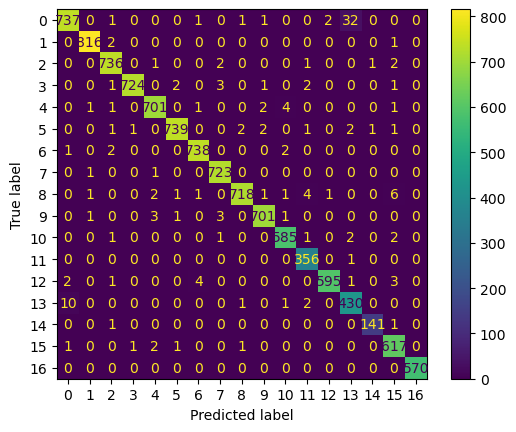

In [110]:
ConfusionMatrixDisplay.from_predictions(y_test, predicted_labels);

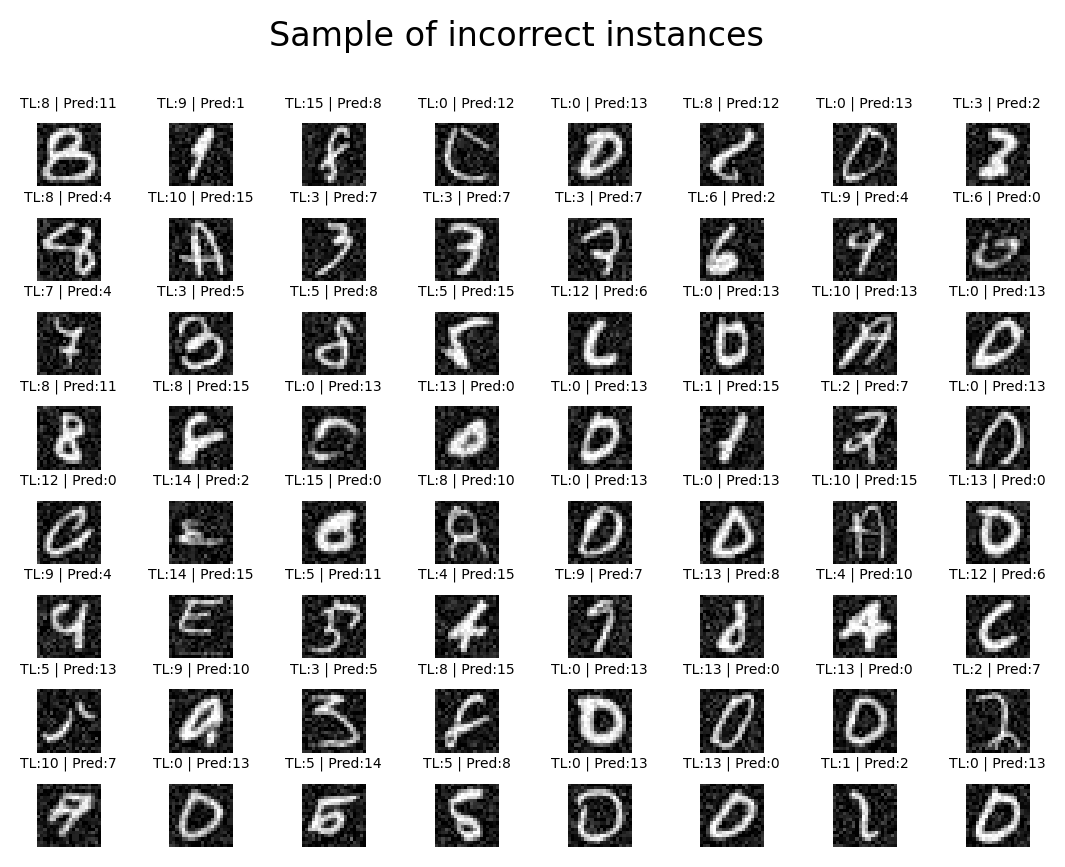

In [111]:
misclassified = X_test[y_test != predicted_labels]
misclassified_y = y_test[y_test != predicted_labels]
misclassified_pred = predicted_labels[y_test != predicted_labels]

def plot_incorrect():
    fig, ax = plt.subplots(nrows=8, ncols=8)
    plt.subplots_adjust(wspace=1.1)
    fig.suptitle('Sample of incorrect instances')
    fig.set_dpi(200.0)

    idx = 0
    for ax in ax.flatten():
        ax.imshow(misclassified[idx].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
        ax.set_title(f'TL:{misclassified_y[idx]} | Pred:{misclassified_pred[idx]}',fontsize=5)
        ax.axis('off')
        idx += 1

plot_incorrect()